# 1. French Motor Third Party Claims

In [4]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv('/Users/maximilianveitl/Documents/Studium/Master/3. Semester/Masterarbeit/freMTPL2freq.csv')
df = df.drop(columns='ClaimNb')
df.shape

# change datatype of IDpol to integer and set it as index
df['IDpol'] = df['IDpol'].astype(int)
df.set_index('IDpol', inplace=True)

df.head()
df.describe()
df.dtypes
df.nunique()

# check for missing values
df.isnull().sum()

Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Area          0
Density       0
Region        0
dtype: int64

In [5]:
# read claim amount file
df_amount = pd.read_csv('/Users/maximilianveitl/Documents/Studium/Master/3. Semester/Masterarbeit/freMTPL2sev.csv')

df_amount.head()

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00


In [6]:
# sum up claim amounts for each IDpol
df_amount = df_amount.groupby('IDpol').sum()

In [7]:
# join claim amounts to features
df = X.join(df_amount)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ClaimAmount
0,0.800500,w,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,NaN
1,-0.039567,m,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,NaN
2,1.793307,w,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,NaN
3,-1.872441,m,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,NaN
4,0.113172,m,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,NaN


In [8]:
# fill NaN values with 0
df.fillna(0, inplace=True)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ClaimAmount
0,0.800500,w,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,0.0
1,-0.039567,m,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,0.0
2,1.793307,w,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,0.0
3,-1.872441,m,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.0
4,0.113172,m,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,0.0


In [9]:
# one-hot encoding
df = pd.get_dummies(df, dtype=int)
df.head()
df.shape

# split data into features and target
X = df.drop(columns='ClaimAmount')
y = df['ClaimAmount']

In [10]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_features = ['Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
X[continuous_features] = scaler.fit_transform(df[continuous_features])

KeyError: "None of [Index(['Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density'], dtype='object')] are in the [columns]"

In [15]:
# split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# train a linear regression model
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [17]:
# make predictions
y_pred_is = linReg.predict(X_train)
y_pred_os = linReg.predict(X_test)

In [18]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_is = mean_squared_error(y_train, y_pred_is)
mse_os = mean_squared_error(y_test, y_pred_os)
r2_is = r2_score(y_train, y_pred_is)
r2_os = r2_score(y_test, y_pred_os)

print(f'MSE (in-sample): {mse_is}')
print(f'MSE (out-of-sample): {mse_os}')
print(f'R^2 (in-sample): {r2_is}')
print(f'R^2 (out-of-sample): {r2_os}')

MSE (in-sample): 40658801.1750133
MSE (out-of-sample): 6849801.839994421
R^2 (in-sample): 0.00016042611641253757
R^2 (out-of-sample): -0.00012712622058685952


In [19]:
rmse_is = np.sqrt(mse_is)
rmse_os = np.sqrt(mse_os)

print(f'RMSE (in-sample): {rmse_is}')
print(f'RMSE (out-of-sample): {rmse_os}')

RMSE (in-sample): 6376.425422994713
RMSE (out-of-sample): 2617.2126088635637


In [20]:
# mean ClaimAmount
y.mean()

88.3628492118627

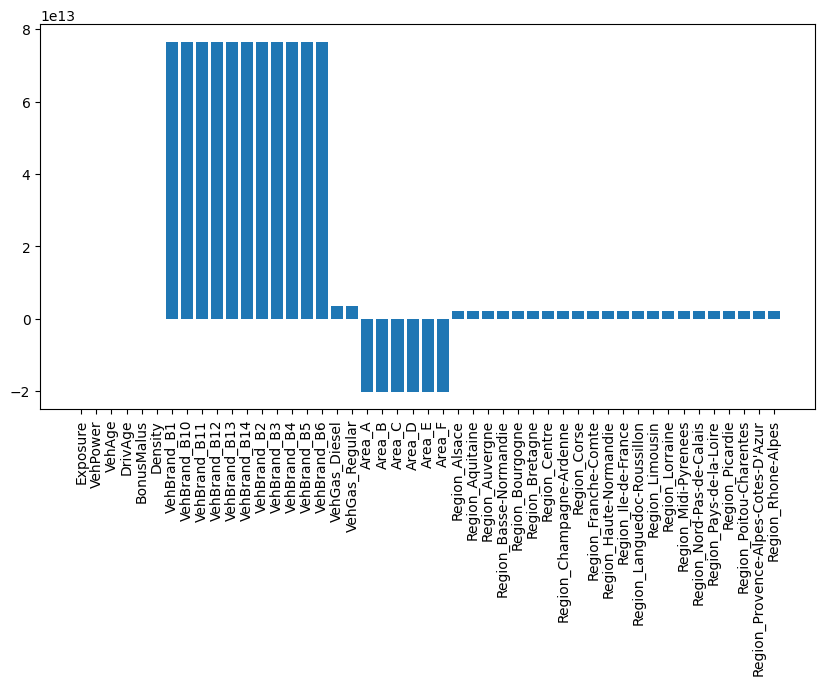

In [25]:
# plot coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(X.columns, linReg.coef_)
plt.xticks(rotation=90)
plt.show()

In [26]:
linReg.intercept_

-61961168939514.01

# 2. Health Insurance Cross Selling Prediction

In [27]:
csell_sample = pd.read_csv('/Users/maximilianveitl/Downloads/sample_submission.csv')
csell_sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [31]:
csell_train = pd.read_csv('/Users/maximilianveitl/Downloads/train.csv')
csell_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [32]:
csell_test = pd.read_csv('/Users/maximilianveitl/Downloads/test.csv')
csell_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [33]:
print('csell_sample shape:', csell_sample.shape)
print('csell_train shape:', csell_train.shape)
print('csell_test shape:', csell_test.shape)

csell_sample shape: (127037, 2)
csell_train shape: (381109, 12)
csell_test shape: (127037, 11)


In [35]:
# join csell_sample and csell_test
test2 = pd.merge(csell_test, csell_sample, on='id')
test2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0


In [36]:
# null values
test2.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [37]:
# id as index
csell_train.set_index('id', inplace=True)
test2.set_index('id', inplace=True)

# One-hot encoding Gender, Vehicle_Age, Vehicle_Damage
csell_train = pd.get_dummies(csell_train, dtype=int)
test2 = pd.get_dummies(test2, dtype=int)

csell_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
id,,,,,,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [38]:
test2.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
id,,,,,,,,,,,,,,,
381110,25,1,11.0,1,35786.0,152.0,53,0,0,1,0,1,0,1,0
381111,40,1,28.0,0,33762.0,7.0,111,0,0,1,1,0,0,0,1
381112,47,1,28.0,0,40050.0,124.0,199,0,0,1,1,0,0,0,1
381113,24,1,27.0,1,37356.0,152.0,187,0,0,1,0,1,0,0,1
381114,27,1,28.0,1,59097.0,152.0,297,0,0,1,0,1,0,1,0


In [46]:
# number of unique values region_code
csell_train['Policy_Sales_Channel'].nunique()

155

In [ ]:
# scale data
scaler = StandardScaler()


In [42]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logReg = LogisticRegression(max_iter=1000)

X_train = csell_train.drop(columns='Response')
y_train = csell_train['Response']
X_test = test2.drop(columns='Response')
y_test = test2['Response']



In [43]:
logReg.fit(X_train, y_train)

/Users/maximilianveitl/opt/anaconda3/envs/maenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:


y_pred_train = logReg.predict(X_train)
y_pred_test = logReg.predict(X_test)

accuracy_is = accuracy_score(y_train, y_pred_train)
accuracy_os = accuracy_score(y_test, y_pred_test)

print(f'Accuracy (in-sample): {accuracy_is}')
print(f'Accuracy (out-of-sample): {accuracy_os}')

# 3. catelematic13

In [47]:
cat = pd.read_csv('/Users/maximilianveitl/Downloads/catelematic13.csv')
cat.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609,Urban,6213.71,25,...,1,0,0,3,1,0,0,0,1,5100.171753
1,182,44,Female,3,Married,Commute,575,Urban,12427.42,20,...,58,24,11,1099,615,219,101,40,1,883.554840
2,184,48,Female,6,Married,Commute,847,Urban,12427.42,14,...,0,0,0,0,0,0,0,0,0,0.000000
3,183,71,Male,6,Married,Private,842,Urban,6213.71,43,...,0,0,0,0,0,0,0,0,0,0.000000
4,183,84,Male,10,Married,Private,856,Urban,6213.71,65,...,2,0,0,325,111,18,4,2,0,0.000000


In [ ]:
# drop NB_claims
cat = cat.drop(columns='Territory')

# one-hot encoding
cat = pd.get_dummies(cat, dtype=int)
cat.head()

SyntaxError: positional argument follows keyword argument (4128422065.py, line 8)

In [63]:
# return columns with index
cat.columns

Index(['Duration', 'Insured.age', 'Car.age', 'Credit.score',
       'Annual.miles.drive', 'Years.noclaims', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.wkend', 'Pct.drive.rush.am',
       'Pct.drive.rush.pm', 'Avgdays.week', 'Right.turn.intensity12',
       'AMT_Claim', 'Insured.sex_Female', 'Insured.sex_Male',
       'Marital_Married', 'Marital_Single', 'Car.use_Commercial',
       'Car.use_Commute', 'Car.use_Farmer', 'Car.use_Private', 'Region_Rural',
       'Region_Urban'],
      dtype='object')

In [61]:
# return column 10
cat.columns[23]

'AMT_Claim'

In [62]:
# drop column 9 to 20
cat = cat.drop(cat.columns[12:22], axis=1)

In [64]:
X = cat.drop(columns='AMT_Claim')
y = cat['AMT_Claim']

In [65]:
# scale data
scaler = StandardScaler()
continuous_features = ['Duration', 'Insured.age', 'Car.age', 'Credit.score', 'Annual.miles.drive', 'Years.noclaims', 'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.wkend', 'Pct.drive.rush.am', 'Pct.drive.rush.pm', 'Avgdays.week', 'Right.turn.intensity12']
X[continuous_features] = scaler.fit_transform(cat[continuous_features])

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# train a linear regression model
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# make predictions
y_pred_is = linReg.predict(X_train)
y_pred_os = linReg.predict(X_test)

# evaluate the model
mse_is = mean_squared_error(y_train, y_pred_is)
mse_os = mean_squared_error(y_test, y_pred_os)
r2_is = r2_score(y_train, y_pred_is)
r2_os = r2_score(y_test, y_pred_os)

print(f'MSE (in-sample): {mse_is}')
print(f'MSE (out-of-sample): {mse_os}')
print(f'R^2 (in-sample): {r2_is}')
print(f'R^2 (out-of-sample): {r2_os}')


MSE (in-sample): 1660693.652463933
MSE (out-of-sample): 1227063.8952619596
R^2 (in-sample): 0.015150110155853658
R^2 (out-of-sample): 0.016348863919222967


In [69]:
from sklearn.tree import DecisionTreeRegressor
# train a linear regression model
linReg = DecisionTreeRegressor(max_depth=4)
linReg.fit(X_train, y_train)

# make predictions
y_pred_is = linReg.predict(X_train)
y_pred_os = linReg.predict(X_test)

# evaluate the model
mse_is = mean_squared_error(y_train, y_pred_is)
mse_os = mean_squared_error(y_test, y_pred_os)
r2_is = r2_score(y_train, y_pred_is)
r2_os = r2_score(y_test, y_pred_os)

print(f'MSE (in-sample): {mse_is}')
print(f'MSE (out-of-sample): {mse_os}')
print(f'R^2 (in-sample): {r2_is}')
print(f'R^2 (out-of-sample): {r2_os}')


MSE (in-sample): 1545459.933311887
MSE (out-of-sample): 1233507.6477542073
R^2 (in-sample): 0.0834877686064921
R^2 (out-of-sample): 0.011183359103950519


# 4. Sklearn Diabetes

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

X, y = load_diabetes(return_X_y=True, as_frame=True)
scaler = StandardScaler()
X_names = X.columns

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_names)
X['sex'] = X.sex.apply(lambda x: 'w' if x > 0 else 'm')

In [2]:
# change first 10 rows of "sex" to x
X.loc[:10, "sex"] = 'x'

In [3]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,x,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,x,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,x,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,x,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,x,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,w,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,w,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,w,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,m,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [4]:
y = (y - y.mean()) / y.std()

In [5]:
from igann import IGANN
model = IGANN(task='regression')
model.fit(X, y)

# 5. Sklearn Iris

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# 1. Lade die Daten
X, y = load_diabetes(return_X_y=True, as_frame=True)

# 2. Trainiere einen Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# 3. Feature Importance berechnen
importances = tree.feature_importances_
features = X.columns

# 4. Sortiere die Features nach Importance
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# 5. Gib die Top-2 Features aus
print("Top 2 wichtigste Features:")
for feature, importance in feature_importance[:2]:
    print(f"{feature}: {importance:.4f}")


Top 2 wichtigste Features:
s6: 0.1366
bp: 0.1294


In [31]:
importances

array([0.07237786, 0.04040323, 0.11538356, 0.12937359, 0.09668775,
       0.12190459, 0.11310235, 0.05653326, 0.11761211, 0.13662169])

# 6. For Regression: Synthetic Dataset with Continous Target

## 6.1 Creation

In [ ]:
np.random.seed(42)

# number of samples
n = 1000

# categorical features
categories1 = ['A', 'B', 'C']
categories2 = ['M', 'N', 'O', 'P']
categories3 = ['X', 'Y', 'Z']

cat_var1 = np.random.choice(categories1, n)
cat_var2 = np.random.choice(categories2, n)
cat_var3 = np.random.choice(categories3, n)

cat_effects1 = {'A': 0, 'B': 1, 'C': -1}
cat_effects2 = {'M': 0.4, 'N': 1, 'O': -0.5, 'P': 0.3}
cat_effects3 = {'X': 0.5, 'Y': -0.5, 'Z': 1}

effect1 = np.array([cat_effects1[cat] for cat in cat_var1])
effect2 = np.array([cat_effects2[cat] for cat in cat_var2])
effect3 = np.array([cat_effects3[cat] for cat in cat_var3])

# numerical features
num_var1 = np.random.normal(0, 1, n)
num_var2 = np.random.normal(0, 1, n)
num_var3 = np.random.normal(0, 1, n)
num_var4 = np.random.normal(0, 1, n)
num_var5 = np.random.normal(0, 1, n)
num_var6 = np.random.normal(0, 1, n)
num_var7 = np.random.normal(0, 1, n)

# interaction effect
interaction1 = 3 * num_var1 * effect1
interaction2 = 2 * num_var5 * effect3

# target variable
y = (2 
    + 1 * effect1 + 2 * effect2 + 1.5 * effect3
    + 3 * num_var1 - 2 * num_var2 + 1.5 * num_var3 - 2.5 * num_var4 + 1.5 * num_var5 - 1.5 * num_var6 + 2 * num_var7
    + 3.5 * interaction1 - 2 * interaction2
    + np.random.normal(0, 1, n))

# create dataframe
df = pd.DataFrame({
    'cat_var1': cat_var1,
    'cat_var2': cat_var2,
    'cat_var3': cat_var3,
    'num_var1': num_var1,
    'num_var2': num_var2,
    'num_var3': num_var3,
    'num_var4': num_var4,
    'num_var5': num_var5,
    'num_var6': num_var6,
    'num_var7': num_var7,
    'y': y
})

df.head()

## 6.2 Data Preperation

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X = pd.get_dummies(X, drop_first=False).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_names = X.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_names)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_names)
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train_scaled = (y_train - y_train_mean) / y_train_std
y_test_scaled = (y_test - y_train_mean) / y_train_std

## 6.3 Linear Regression

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

y_pred_is = linreg.predict(X_train_scaled) * y_train_std + y_train_mean
y_pred_os = linreg.predict(X_test_scaled) * y_train_std + y_train_mean

print('In-sample MSE:', mean_squared_error(y_train, y_pred_is))
print('Out-of-sample MSE:', mean_squared_error(y_test, y_pred_os))
print('In-sample R^2:', r2_score(y_train, y_pred_is))
print('Out-of-sample R^2:', r2_score(y_test, y_pred_os))

## 6.4 IGANN

In [ ]:
# igann
from igann import IGANN

igann = IGANN(task='regression')
igann.fit(X_train_scaled, y_train_scaled)

y_pred_is = igann.predict(X_train_scaled) * y_train_std + y_train_mean
y_pred_os = igann.predict(X_test_scaled) * y_train_std + y_train_mean

print('In-sample MSE:', mean_squared_error(y_train, y_pred_is))
print('Out-of-sample MSE:', mean_squared_error(y_test, y_pred_os))
print('In-sample R^2:', r2_score(y_train, y_pred_is))
print('Out-of-sample R^2:', r2_score(y_test, y_pred_os))

# 7. For Classification: Synthetic Dataset for Categorical Target

In [ ]:
# Cut continuous y in 2 categories with 20%/80% distribution
threshold = df['y'].quantile(0.2)
df_cat = df.copy()
df_cat['y'] = np.where(df_cat['y'] < threshold, 0, 1)